In [1]:
!pip list

Package                      Version
---------------------------- -----------
absl-py                      1.4.0
asttokens                    2.2.1
astunparse                   1.6.3
backcall                     0.2.0
cachetools                   5.3.1
certifi                      2023.7.22
charset-normalizer           3.2.0
comm                         0.1.4
contourpy                    1.1.0
cycler                       0.11.0
debugpy                      1.6.7.post1
decorator                    5.1.1
executing                    1.2.0
flatbuffers                  23.5.26
fonttools                    4.42.0
gast                         0.4.0
google-auth                  2.22.0
google-auth-oauthlib         1.0.0
google-pasta                 0.2.0
grpcio                       1.57.0
h5py                         3.9.0
idna                         3.4
ipykernel                    6.25.1
ipython                      8.14.0
jedi                         0.19.0
jupyter_client               8

In [2]:
import tensorflow as tf
import os

2023-08-13 11:07:20.450064: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-13 11:07:20.735284: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-13 11:07:20.736623: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-13 11:07:22.149972: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
gpus=tf.config.experimental.list_logical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# IMPORTING LIBRARIES

In [4]:
import cv2
import imghdr
import matplotlib.pyplot as plt
import numpy as np

In [5]:
data_dir="data"

In [6]:
image_exts=['jpeg', 'jpg', 'bmp', 'png']

In [7]:
img=cv2.imread(os.path.join('data', 'sad', 'original.jpg'))

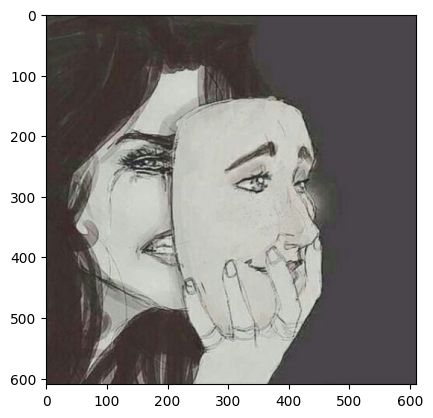

In [8]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [9]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path=os.path.join(data_dir, image_class, image)
        try:
            img=cv2.imread(image_path)
            tip=imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in extension list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print("Issue with image {}".format(image_path))

In [10]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Source:   
@keras_export(
    "keras.utils.image_dataset_from_directory",
    "keras.preprocessing.image_dataset_from_directory",
    v1=[],
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
):
    """Generates a `tf.data.Dataset` from image files in a directory.

    If your directory structure is:



In [11]:
data=tf.keras.utils.image_dataset_from_directory('data')

Found 302 files belonging to 2 classes.


In [12]:
data_iterator = data.as_numpy_iterator()

In [13]:
batch=data_iterator.next()

2023-08-13 11:07:30.409254: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 108456960 exceeds 10% of free system memory.


In [15]:
# images as numpy array
batch[0].shape

(32, 256, 256, 3)

In [16]:
# class labels
batch[1]

array([1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0], dtype=int32)

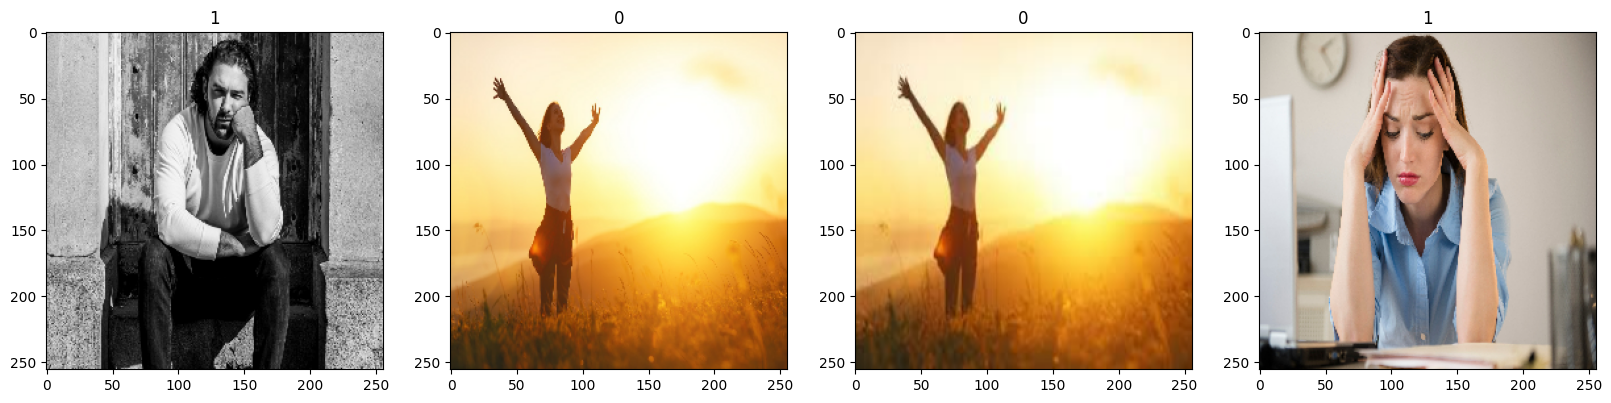

In [17]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# PREPROCESSING

SCALE THE DATA

In [18]:
data=data.map(lambda x, y: (x/255, y))

In [19]:
data.as_numpy_iterator().next()[0].max()

2023-08-13 11:07:33.663138: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 108456960 exceeds 10% of free system memory.


1.0

SPLITTING

In [20]:
len(data)

10

In [21]:
train_size=int(len(data)*.7)
val_size=int(len(data)*.2)
test_size=int(len(data)*.1)

In [22]:
test_size

1

In [23]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [24]:
len(test)

1

# MODELLING

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [27]:
model=Sequential()

In [29]:
model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [30]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

TRAIN

In [32]:
logdir='logs'
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [33]:
hist=model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


2023-08-13 12:06:39.884852: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 108456960 exceeds 10% of free system memory.
2023-08-13 12:06:40.242361: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 132128768 exceeds 10% of free system memory.
2023-08-13 12:06:40.904471: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 66064384 exceeds 10% of free system memory.


7/7 [==============================] - 10s 1s/step - loss: 1.0111 - accuracy: 0.5179 - val_loss: 0.5896 - val_accuracy: 0.5781
Epoch 2/20
7/7 [==============================] - 9s 1s/step - loss: 0.6172 - accuracy: 0.5759 - val_loss: 0.5806 - val_accuracy: 0.7500
Epoch 3/20
7/7 [==============================] - 9s 1s/step - loss: 0.5595 - accuracy: 0.7812 - val_loss: 0.4838 - val_accuracy: 0.7812
Epoch 4/20
7/7 [==============================] - 9s 1s/step - loss: 0.5465 - accuracy: 0.7589 - val_loss: 0.4372 - val_accuracy: 0.8906
Epoch 5/20
7/7 [==============================] - 10s 1s/step - loss: 0.4306 - accuracy: 0.8482 - val_loss: 0.3118 - val_accuracy: 0.9375
Epoch 6/20
7/7 [==============================] - 9s 1s/step - loss: 0.3213 - accuracy: 0.8750 - val_loss: 0.2257 - val_accuracy: 0.9531
Epoch 7/20
7/7 [==============================] - 9s 1s/step - loss: 0.2621 - accuracy: 0.9286 - val_loss: 0.1734 - val_accuracy: 0.9844
Epoch 8/20
7/7 [==============================] - 